RED WINE QUALITY

Table Of Content

<a id="content"></a>    
<div style="border-radius:20px; padding: 15px; font-size:100%; text-align:left; background-image: url(https://i.postimg.cc/0jG2Q5Nm/Adobe-Stock-522250922-Preview-Medium.jpg)">

<h2><span style="text-align:center; font-weight:bolder; color:navy; font-size:130%">Table of Contents:</span></h2>

 * **[Step 1 | Python Libraries](#setup)**
    -  [1.1 | Import Libraries](#import)
    -  [1.2 | Library configurations](#config)
 *  **[Step 2 | Data](#data)**
    -  [2.1 | Collecting Data](#load_data)
    -  [2.2 | Data Information](#info)
    -  [2.3 | Attribute Information](#columns)
 *  **[Step 3 | Data Preprocessning](#preprocessing)**
    -  [3.1 | Missing Values Handling](#missing)
    -  [3.2 | Visualization and Plots](#plot)
    -  [3.5 | Normalization](#norm)
 *  **[Step 4 | Modeling](#ml)**
    -  [4.1 | LogisticRegression](#lr)
    -  [4.2 | DecisionTreeClassifier](#tree)
    -  [4.3 | RandomForestClassifier](#rf)
    -  [4.4 | SVC](#svc)
    -  [4.5 | KNeighborsClassifier](#knn)
    -  [4.6 | GaussianNB](#gnb)
    -  [4.7 | Result](#result)

Step1 | Python Libraries

Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import style
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


Step 2.1 | Collecting Data

In [2]:
import os
os.getcwd()

'C:\\Users\\KARAN\\Desktop'

In [3]:
df = pd.read_csv('winequality_red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Step 2.2 | Data Information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Step 2.3 | Attribute Information

<div style="border-radius:20px; padding: 15px; font-size:100%; text-align:left; background-image: url(https://i.postimg.cc/0jG2Q5Nm/Adobe-Stock-522250922-Preview-Medium.jpg)">
    
<h2 style='border:0; border-radius: 15px; font-weight: 800; color:#9b006e; font-size:280%'><center> Attribute Information
</center></h2>

|Feature|Explain|
|-------|-------|
|**fixed acidity**|most acids involved with wine or fixed or nonvolatile|
|**volatile acidity**|the amount of acetic acid in wine|
|**citric acid**|the amount of citric acid in wine|
|**residual sugar**|the amount of sugar remaining after fermentation stops|
|**chlorides**|the amount of salt in the wine.|
|**free sulfur dioxide**|the amount of free sulfur dioxide in the wine(those available to react and thus exhibit both germicidal and antioxidant properties)|
|**total sulfur dioxide**|amount of free and bound forms of SO2|
|**density**|the measurement of how tightly a material is packed together|
|**PH**|describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4|
|**Alcohol**|the percent alcohol content of the wine|
|**quality**|output variable (based on sensory data, score between 3 and 8)|

Step 3 | Data Preprocessning

Step 3.1 | Missing Values Handling

In [6]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There is no missing values

Step 3.2 | Visualization and Plots

In [7]:
# Rename columns to better recall them.
df.rename(columns = {"fixed acidity": "fixed_acidity",
                       "volatile acidity": "volatile_acidity",
                       "citric acid": "citric_acid",
                       "residual sugar": "residual_sugar",
                       "chlorides": "chlorides",
                       "free sulfur dioxide": "free_sulfur_dioxide",
                       "total sulfur dioxide": "total_sulfur_dioxide"},
            inplace = True)

In [8]:
# Create a list of DataFrame columns
columns = list(df.columns)


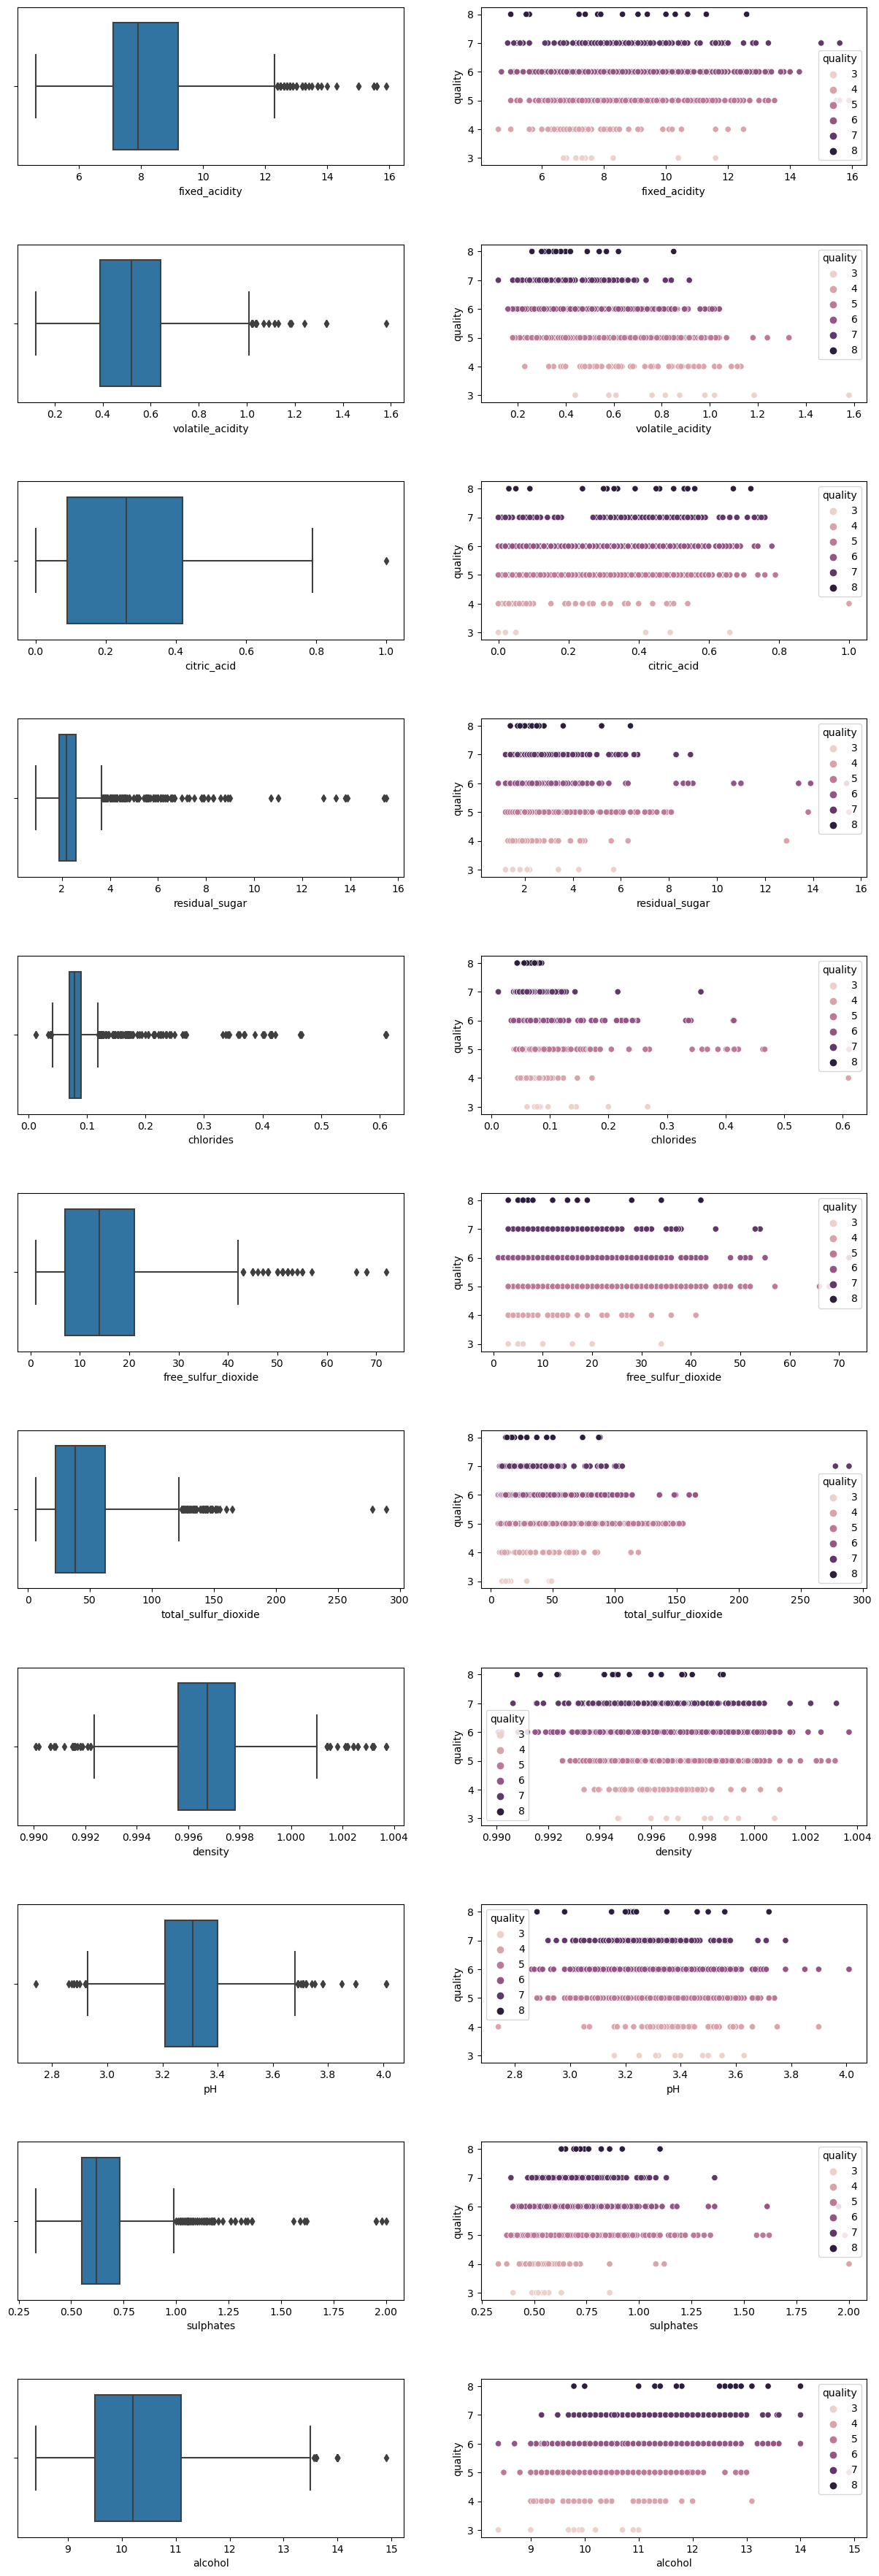

In [9]:
fig, ax = plt.subplots(11, 2, figsize=(15, 45))
plt.subplots_adjust(hspace = 0.5)
for i in range(11) :
    # AX 1
    sns.boxplot(x=columns[i], data=df, ax=ax[i, 0])
    # Ax 2
    sns.scatterplot(x=columns[i], y='quality', data=df, hue='quality', ax=ax[i, 1])

In [10]:
df['quality'].value_counts()


quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

<Axes: xlabel='quality', ylabel='count'>

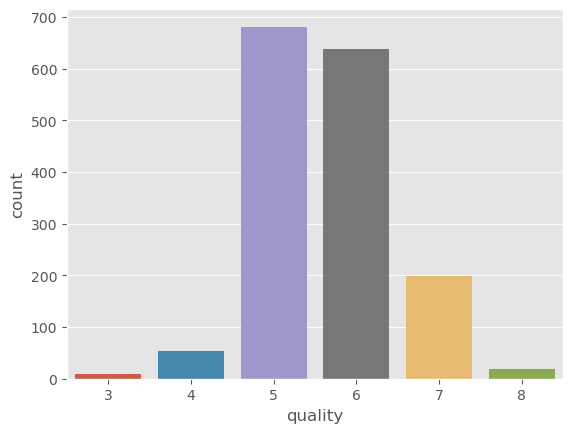

In [11]:
plt.style.use('ggplot')
sns.countplot(x='quality', data=df)

In [12]:
df.corr()['quality'].sort_values()

volatile_acidity       -0.390558
total_sulfur_dioxide   -0.185100
density                -0.174919
chlorides              -0.128907
pH                     -0.057731
free_sulfur_dioxide    -0.050656
residual_sugar          0.013732
fixed_acidity           0.124052
citric_acid             0.226373
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

<Axes: xlabel='quality', ylabel='alcohol'>

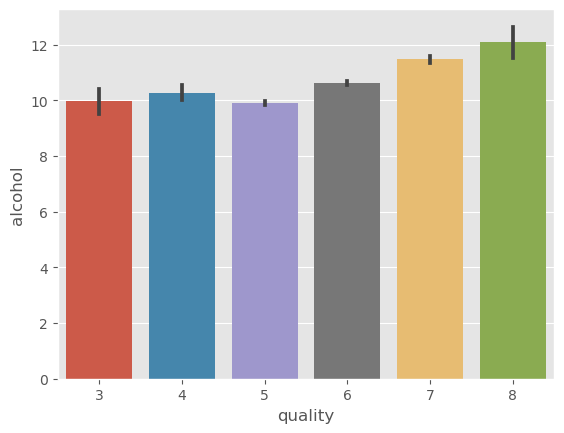

In [13]:
sns.barplot(x='quality', y='alcohol', data=df)

Step 3.3 |Normalization

In [14]:
df.corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile_acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric_acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual_sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free_sulfur_dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total_sulfur_dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [15]:
df['quality'] = df.quality.apply(lambda x:1 if x>=7 else 0)

In [16]:
df['quality'].value_counts()

quality
0    1382
1     217
Name: count, dtype: int64

In [17]:
X = df.drop('quality', axis=1)
y = df['quality']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [19]:
print("X_train ", X_train.shape)
print("y_train ", y_train.shape)
print("X_test ", X_test.shape)
print("y_test ", y_test.shape)

X_train  (1119, 11)
y_train  (1119,)
X_test  (480, 11)
y_test  (480,)


Step 4 | Modeling

Step 4.1 |Logistic Regression 

In [20]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy is: {:.2f}%".format(logreg_acc*100))

Test accuracy is: 86.88%


In [21]:
print(classification_report(y_test, logreg_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       413
           1       0.58      0.21      0.31        67

    accuracy                           0.87       480
   macro avg       0.73      0.59      0.62       480
weighted avg       0.84      0.87      0.84       480



Step 4.2 | DecisionTree

In [22]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
dtree_pred = dtree.predict(X_test)
dtree_acc = accuracy_score(dtree_pred, y_test)
print("Test accuracy: {:.2f}%".format(dtree_acc*100))

Test accuracy: 86.04%


In [23]:
print(classification_report(y_test, logreg_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       413
           1       0.58      0.21      0.31        67

    accuracy                           0.87       480
   macro avg       0.73      0.59      0.62       480
weighted avg       0.84      0.87      0.84       480



Step 4.3 | Random Forest

In [24]:
rforest = RandomForestClassifier()
rforest.fit(X_train, y_train)
rforest_pred = rforest.predict(X_test)
rforest_acc = accuracy_score(rforest_pred, y_test)
print("Test accuracy: {:.2f}%".format(rforest_acc*100))

Test accuracy: 89.17%


In [25]:
print(classification_report(y_test, logreg_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       413
           1       0.58      0.21      0.31        67

    accuracy                           0.87       480
   macro avg       0.73      0.59      0.62       480
weighted avg       0.84      0.87      0.84       480



Step 4.4 | SVC

In [26]:
svc = SVC()
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("Test accuracy: {:.2f}%".format(svc_acc*100))

Test accuracy: 86.25%


In [27]:
print(classification_report(y_test, logreg_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       413
           1       0.58      0.21      0.31        67

    accuracy                           0.87       480
   macro avg       0.73      0.59      0.62       480
weighted avg       0.84      0.87      0.84       480



In [28]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_acc = accuracy_score(knn_pred, y_test)
print("Test accuracy: {:.2f}%".format(knn_acc*100))

Test accuracy: 85.83%


In [29]:
print(classification_report(y_test, logreg_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       413
           1       0.58      0.21      0.31        67

    accuracy                           0.87       480
   macro avg       0.73      0.59      0.62       480
weighted avg       0.84      0.87      0.84       480



Step 4.5 | GaussianNB

In [30]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_pred = gnb.predict(X_test)
gnb_acc = accuracy_score(gnb_pred, y_test)
print("Test accuracy: {:.2f}%".format(gnb_acc*100))

Test accuracy: 84.38%


In [31]:
print(classification_report(y_test, logreg_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       413
           1       0.58      0.21      0.31        67

    accuracy                           0.87       480
   macro avg       0.73      0.59      0.62       480
weighted avg       0.84      0.87      0.84       480



Step 4.7 | Result

In [33]:
Accuracy = [ '86.88%', '86.67%' , '89.58%' , '86.25%' ,'84.38%']

Frame = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest','SVC','GaussianNB'],
    'Accuracy': Accuracy
})

Frame.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
2,Random Forest,89.58%
0,Logistic Regression,86.88%
1,Decision Tree,86.67%
3,SVC,86.25%
4,GaussianNB,84.38%


Results : 

Acording to the above plots, best Model  base on Score is :

Random Forest
So, We choose  Random Forest 